In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [1]:
print("TensorFlow version:", tf.__version__)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)

NameError: name 'tf' is not defined

In [3]:
!pip install kaggle

Data Preprocessing

In [4]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [01:36<00:00, 32.5MB/s]
100% 2.70G/2.70G [01:36<00:00, 30.1MB/s]


In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [6]:
!kaggle datasets download 'vipoooool/new-plant-diseases-dataset'

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
new-plant-diseases-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)


Found 70295 files belonging to 38 classes.


Validation Imgae Preprocessing

In [9]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
     crop_to_aspect_ratio=False

)

Found 17572 files belonging to 38 classes.


In [10]:
print(training_set.element_spec)

(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))


In [11]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [13]:
# for images, labels in training_set.take(1):  # Take one batch
#     plt.figure(figsize=(10, 10))
#     for i in range(9):  # Change the range to print more images
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(training_set.class_names[labels[i]])
#         plt.axis("off")

In [14]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[146.   147.   178.  ]
   [146.   147.   178.  ]
   [144.25 145.25 176.25]
   ...
   [144.   145.   175.  ]
   [141.   142.   172.  ]
   [148.75 149.75 179.75]]

  [[146.   147.   178.  ]
   [146.   147.   178.  ]
   [145.   146.   177.  ]
   ...
   [150.25 151.25 181.25]
   [142.75 143.75 173.75]
   [149.5  150.5  180.5 ]]

  [[145.75 146.75 177.75]
   [146.75 147.75 178.75]
   [146.25 147.25 178.25]
   ...
   [143.   144.   174.  ]
   [148.   149.   179.  ]
   [141.25 142.25 172.25]]

  ...

  [[139.   130.   157.  ]
   [140.25 131.25 158.25]
   [135.25 126.25 153.25]
   ...
   [132.   124.   147.  ]
   [129.   121.   144.  ]
   [123.75 115.75 138.75]]

  [[143.75 134.75 161.75]
   [139.25 130.25 157.25]
   [144.   135.   162.  ]
   ...
   [143.   135.   158.  ]
   [136.75 128.75 151.75]
   [143.5  135.5  158.5 ]]

  [[137.5  128.5  155.5 ]
   [140.75 131.75 158.75]
   [140.5  131.5  158.5 ]
   ...
   [151.25 143.25 166.25]
   [161.5  153.5  176.5 ]
   [136.   128.   15

Now We Are Building Model

In [15]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [16]:

cnn = tf.keras.models.Sequential()

In [17]:
print(training_set.element_spec)


(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))


In [18]:
for images, labels in training_set.take(1):  # Take the first batch for inspection
    print("Batch size:", images.shape[0])
    print("Image shape:", images.shape[1:])  # Excluding batch dimension
    print("Data type:", images.dtype)


Batch size: 32
Image shape: (128, 128, 3)
Data type: <dtype: 'float32'>


In [19]:
print("Expected batch size:", 32)  # Replace with your expected batch size


Expected batch size: 32


Adding Convolution Layer

In [20]:

# # Define your CNN model
# model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
# model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2, strides=2))

# model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
# model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2, strides=2))

# model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
# model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2, strides=2))

# model.add(Conv2D(filters=265, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
# model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2, strides=2))


# model.add(Flatten())
# model.add(Dense(units=1024, activation='relu'))
# model.add(Dense(units=38, activation='softmax'))  # Adjust units to match number of classes

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model.summary();
# # Train the model
# model.fit(training_set, epochs=10)  # Adjust epochs as needed


In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [25]:

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [26]:

cnn.add(tf.keras.layers.Flatten())

In [27]:

cnn.add(tf.keras.layers.Dropout(0.25))

In [28]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [29]:

cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [30]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))


Compiling and Training Phase

In [31]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [33]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 137s 59ms/step - loss: 1.4609 - accuracy: 0.5701 - val_loss: 0.5985 - val_accuracy: 0.8078
Epoch 2/10
2197/2197 [==============================] - 128s 58ms/step - loss: 0.4704 - accuracy: 0.8511 - val_loss: 0.2934 - val_accuracy: 0.9025
Epoch 3/10
2197/2197 [==============================] - 129s 59ms/step - loss: 0.2847 - accuracy: 0.9080 - val_loss: 0.2677 - val_accuracy: 0.9120
Epoch 4/10
2197/2197 [==============================] - 127s 58ms/step - loss: 0.1903 - accuracy: 0.9375 - val_loss: 0.1897 - val_accuracy: 0.9375
Epoch 5/10
2197/2197 [==============================] - 127s 58ms/step - loss: 0.1381 - accuracy: 0.9545 - val_loss: 0.1539 - val_accuracy: 0.9504
Epoch 6/10
2197/2197 [==============================] - 126s 57ms/step - loss: 0.1116 - accuracy: 0.9636 - val_loss: 0.1938 - val_accuracy: 0.9400
Epoch 7/10
2197/2197 [==============================] - 129s 59ms/step - loss: 0.0917 - accuracy: 0.9701 - val_loss: 0

In [34]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 49s 22ms/step - loss: 0.0517 - accuracy: 0.9827
Training accuracy: 0.9827157258987427


In [35]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 11s 19ms/step - loss: 0.1742 - accuracy: 0.9498
Validation accuracy: 0.9498065114021301


In [36]:
cnn.save('trained_plant_disease_model.keras')

In [37]:
training_history.history #Return Dictionary of history

{'loss': [1.460891842842102,
  0.47043314576148987,
  0.2847370207309723,
  0.19029824435710907,
  0.13813737034797668,
  0.11163661628961563,
  0.09165601432323456,
  0.07557767629623413,
  0.06542456895112991,
  0.0561697818338871],
 'accuracy': [0.5701401233673096,
  0.8511131405830383,
  0.908044695854187,
  0.9375346899032593,
  0.9544917941093445,
  0.9635536074638367,
  0.9701259136199951,
  0.9752044677734375,
  0.9790170192718506,
  0.9811081886291504],
 'val_loss': [0.598472535610199,
  0.29343584179878235,
  0.26769593358039856,
  0.1897372305393219,
  0.15393294394016266,
  0.1938137710094452,
  0.16530346870422363,
  0.1503111869096756,
  0.13361799716949463,
  0.17419442534446716],
 'val_accuracy': [0.8077623248100281,
  0.9024584293365479,
  0.9120191335678101,
  0.9374573230743408,
  0.9503756165504456,
  0.939961314201355,
  0.947416365146637,
  0.95083087682724,
  0.959537923336029,
  0.9498065114021301]}

In [38]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [39]:

print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Accuracy Visualization

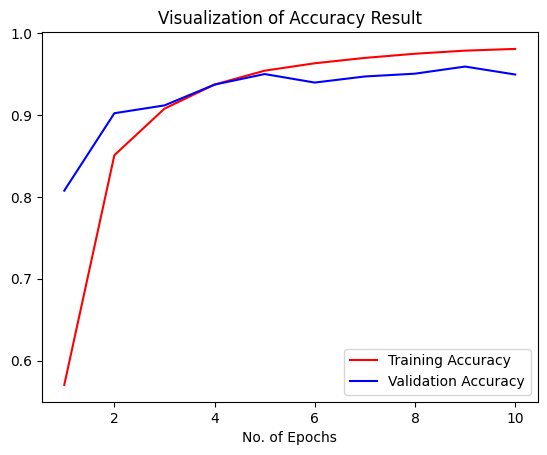

In [40]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

Some other metrics for model evaluation

In [41]:
class_name = validation_set.class_names

In [42]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [43]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 52s 3ms/step


In [44]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [45]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [46]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [47]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [48]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.95      0.96       504
                                 Apple___Black_rot       0.96      0.94      0.95       497
                          Apple___Cedar_apple_rust       0.91      0.99      0.95       440
                                   Apple___healthy       0.86      0.96      0.91       502
                               Blueberry___healthy       0.97      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.97      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.92      0.91       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.96      0.

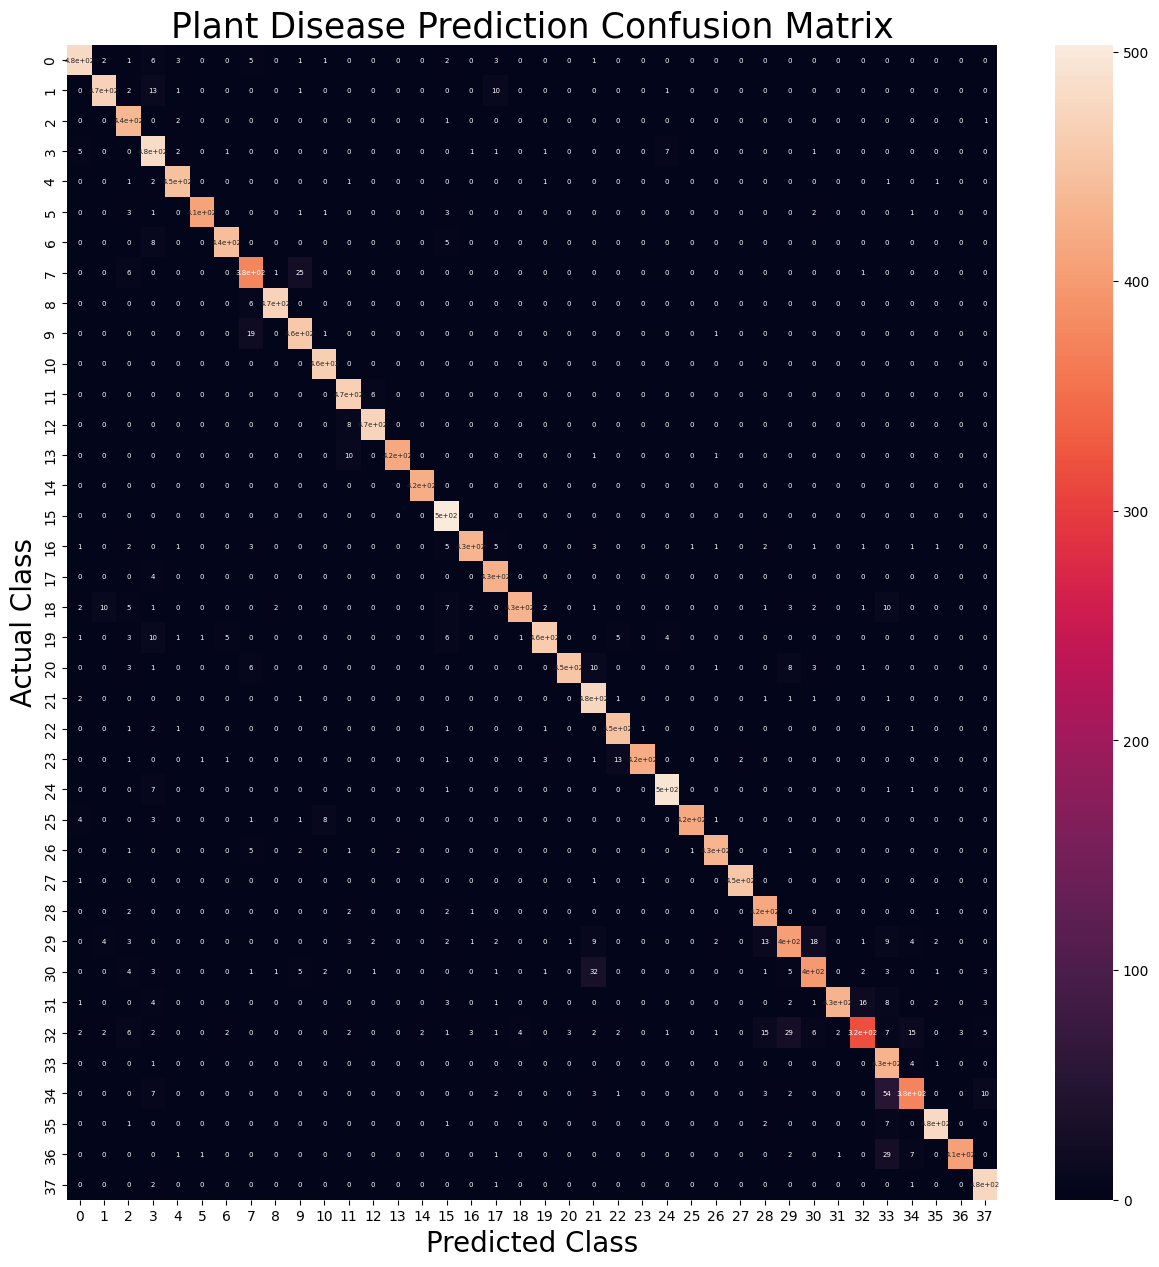

In [55]:
plt.figure(figsize=(15, 15))
sns.heatmap(cm,annot=True,annot_kws={"size": 5})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()